In [1]:
import glob
import yaml
import torch
import imageio
import argparse
import numpy as np

from tqdm import tqdm
from copy import deepcopy
from pathlib import Path
from omegaconf import OmegaConf
from importlib import import_module
from torchvision.transforms.functional import resized_crop

# from torch import string_classes

from main import instantiate_from_config
from x2ct_nerf.modules.losses.lpips import LPIPS
from utils.logger.TestLogger import ExperimentLogger
from utils.metrics import Peak_Signal_to_Noise_Rate_total, Peak_Signal_to_Noise_Rate_2D, Structural_Similarity_slice, Structural_Similarity, mse2psnr, img2mse, to8b


In [2]:
import os
import sys
import glob
import datetime
import argparse
import importlib
from omegaconf import OmegaConf
import numpy as np
from PIL import Image
import torch
import torchvision
from torch.utils.data import random_split, DataLoader, Dataset
import pytorch_lightning as pl
from pytorch_lightning import seed_everything
from pytorch_lightning.trainer import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, Callback, LearningRateMonitor
from pytorch_lightning.utilities.distributed import rank_zero_only
import wandb
import pdb

from taming.data.utils import custom_collate

In [ ]:
import os
import json
import glob
import yaml
import torch
import imageio
import argparse
import numpy as np

from tqdm import tqdm
from pathlib import Path
from copy import deepcopy
from omegaconf import OmegaConf
from importlib import import_module

from main import instantiate_from_config
from x2ct_nerf.modules.losses.lpips import LPIPS
from utils.metrics import mse2psnr, img2mse, to8b
from utils.metrics import Peak_Signal_to_Noise_Rate_total, Peak_Signal_to_Noise_Rate_2D, Structural_Similarity_slice, Structural_Similarity
from utils.logger.TestLogger import ExperimentLogger
from torchvision.transforms.functional import resized_crop

Keys: ct


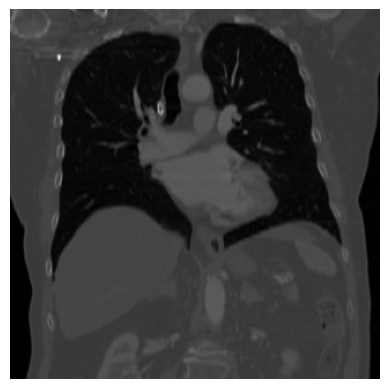

In [6]:
# convert h5 to image
import h5py
import numpy as np
import io
from PIL import Image
import matplotlib.pyplot as plt

hdf5_file = 'data_preprocessing/lidc_idri/LIDC-HDF5-256_ct320_ct128_CTSlice/LIDC-IDRI-0001.20000101.3000566.1/ct/coronal_064.h5'

hf = h5py.File(hdf5_file, 'r') # open a hdf5 file

key = list(hf.keys())[0]
print("Keys: %s" % key)

np_array = np.array(hf[key])   # write the data to hdf5 file
# Normalize to 0-1
np_array_normalized = (np_array - np.min(np_array)) / (np.max(np_array) - np.min(np_array))

# Scale to 0-255
np_array_scaled = np_array_normalized * 255

# Optionally, convert to uint8 type if you want to use it as image data
np_array_scaled = np_array_scaled.astype(np.uint8)
# Convert NumPy array to PIL Image
image = Image.fromarray(np_array_scaled.astype('uint8'), 'L')

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Optional: turn off the axis
plt.show()

In [7]:
data

array([[1044, 1219, 1513, ...,  909,  926,  917],
       [1031, 1194, 1510, ...,  905,  924,  913],
       [1029, 1188, 1522, ...,  894,  916,  902],
       ...,
       [   9,   11,    7, ...,    9,   11,   17],
       [   9,    7,    7, ...,   10,   10,   16],
       [   8,    4,    7, ...,   11,   10,   17]], dtype=int16)